In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from gaze_utility import calculate_dist_and_veloc
from fixation import generate_IVT_fixation
from preprocessing import remove_outlier_by_z, get_participant_names

data_path = 'data/'

# get participant names
names = get_participant_names(data_path)
print('participants names: ', names)
print('participant num: ', len(names))

participants names:  ['lf', 'yx', 'mr', 'jt', 'yz', 'ts', 'lr', 'yq', 'hw', 'mh']
participant num:  10


<AxesSubplot:xlabel='GazeX', ylabel='GazeY'>

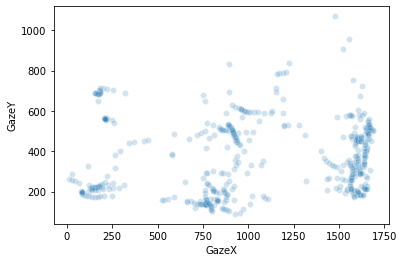

In [2]:
# take grid1 of for example
name = 'lf'
gaze_data = pd.read_json(data_path + name + '_gaze.txt', lines=True)
data = gaze_data.loc[gaze_data['record_event'] == 'gaze_grid_2']
sns.scatterplot(x='GazeX', y='GazeY', data=data, alpha=0.2)

<AxesSubplot:xlabel='GazeX', ylabel='GazeY'>

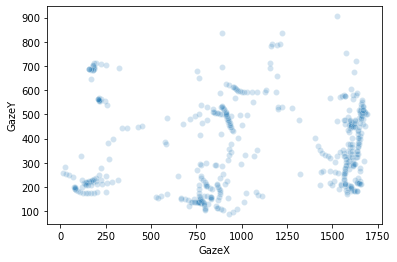

In [3]:
# remove outlier
data = remove_outlier_by_z(data, 'GazeX')
data = remove_outlier_by_z(data, 'GazeY')
sns.scatterplot(x='GazeX', y='GazeY', data=data, alpha=0.2)

In [4]:
# calculate dist, velocity, time passed
data['distance'], data['velocity'], data['time_pass'] = calculate_dist_and_veloc(data)

0.2     77
0.1     63
0.3     43
0.5     39
0.4     39
        ..
3.4      1
14.8     1
8.1      1
17.3     1
7.2      1
Name: velocity, Length: 74, dtype: int64


<AxesSubplot:xlabel='velocity'>

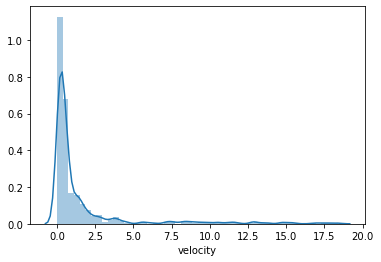

In [5]:
v = data['velocity'].round(1)
print(v.value_counts())
sns.distplot(v)

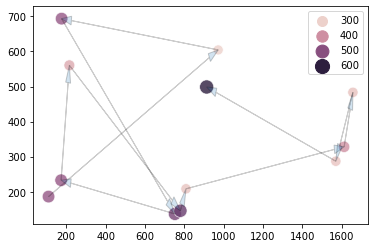

In [6]:
fixations = generate_IVT_fixation(data, v_th=0.5, d_th=300)
fixations_points = np.array([f['centroid'] for f in fixations])
durations = [f['duration'] for f in fixations]
sns.scatterplot(x=fixations_points[:, 0], y=fixations_points[:, 1],
                size=durations, sizes=(100,200),
                hue=durations, alpha=0.8)

for i, f in enumerate(fixations_points):
    if i + 1 == len(fixations): break
    nex = fixations_points[i+1]
    cur = fixations_points[i]
    plt.arrow(cur[0], cur[1], nex[0]-cur[0], nex[1]-cur[1],
              alpha=0.2, head_length=50, head_width=25,
              zorder=100, length_includes_head=True)

<AxesSubplot:>

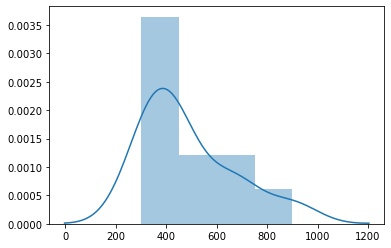

In [7]:
sns.distplot(durations)

# Batch Analysis

In [7]:
data_path = 'data/'
result_path = 'result/'
events = ['gaze_grid_1', 'gaze_ranking_grid_1', 'gaze_grid_2', 'gaze_ranking_grid_2']
xn = 'GazeX'
yn = 'GazeY'

# get participant names
names = get_participant_names(data_path)
print('participants names: ', names)
print('participant num: ', len(names))

for name in names:
    gaze_data = pd.read_json(data_path + name + '_gaze.txt', lines=True)
    for event in events:
        # log
        print('start: ' + name + '-' + event)
        # load data
        data = gaze_data.loc[gaze_data['record_event'] == event]
        # remove outlier
        data = remove_outlier_by_z(data, 'GazeX')
        data = remove_outlier_by_z(data, 'GazeY')
        # construct attr
        data['distance'], data['velocity'], data['time_pass'] = calculate_dist_and_veloc(data)
        # generate fixation
        fixations = generate_IVT_fixation(data, v_th=0.5, d_th=300)
        fixations_points = np.array([f['centroid'] for f in fixations])
        durations = [f['duration'] for f in fixations]
        # draw fixation
        sns.scatterplot(x=fixations_points[:, 0], y=fixations_points[:, 1],
                size=durations, sizes=(100,200),
                hue=durations, alpha=0.8)
        # draw scan path
        for i, f in enumerate(fixations_points):
            if i + 1 == len(fixations): break
            nex = fixations_points[i+1]
            cur = fixations_points[i]
            plt.arrow(cur[0], cur[1], nex[0]-cur[0], nex[1]-cur[1],
                    alpha=0.2, head_length=50, head_width=25,
                    zorder=100, length_includes_head=True)
        # export result
        plt.savefig(result_path + name + '_' + event + '_plot.png', format='png')
        # log
        print('finish: ' + name + '-' + event)
        plt.clf()

participants names:  ['lf', 'yx', 'mr', 'jt', 'yz', 'ts', 'lr', 'yq', 'hw', 'mh']
participant num:  10
start: lf-gaze_grid_1
finish: lf-gaze_grid_1
start: lf-gaze_ranking_grid_1
finish: lf-gaze_ranking_grid_1
start: lf-gaze_grid_2
finish: lf-gaze_grid_2
start: lf-gaze_ranking_grid_2
finish: lf-gaze_ranking_grid_2
start: yx-gaze_grid_1
finish: yx-gaze_grid_1
start: yx-gaze_ranking_grid_1
finish: yx-gaze_ranking_grid_1
start: yx-gaze_grid_2
finish: yx-gaze_grid_2
start: yx-gaze_ranking_grid_2
finish: yx-gaze_ranking_grid_2
start: mr-gaze_grid_1
finish: mr-gaze_grid_1
start: mr-gaze_ranking_grid_1
finish: mr-gaze_ranking_grid_1
start: mr-gaze_grid_2
finish: mr-gaze_grid_2
start: mr-gaze_ranking_grid_2
finish: mr-gaze_ranking_grid_2
start: jt-gaze_grid_1
finish: jt-gaze_grid_1
start: jt-gaze_ranking_grid_1
finish: jt-gaze_ranking_grid_1
start: jt-gaze_grid_2
finish: jt-gaze_grid_2
start: jt-gaze_ranking_grid_2
finish: jt-gaze_ranking_grid_2
start: yz-gaze_grid_1
finish: yz-gaze_grid_1
star

<Figure size 432x288 with 0 Axes>